In [15]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [16]:
data = []
with open("./network_data.log", 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [17]:
traffic = pd.DataFrame(data)

In [18]:
traffic.sample(10)

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url,url_index
419531,None,None,219906,200,True,0.208726,1508009232,http://www.facebook.com,1
191437,None,None,46010,200,True,0.096473,1508009232,http://www.apple.com,2
468945,None,None,10730,200,True,0.140971,1508009449,http://www.google.com,0
725262,None,None,46010,200,True,0.096473,1508009232,http://www.apple.com,2
1285886,None,None,219911,200,True,0.198614,1508009702,http://www.facebook.com,1
596971,None,None,219557,200,True,0.232633,1508009250,http://www.facebook.com,1
1517208,None,None,170607,200,True,0.286081,1508009611,http://www.microsoft.com,3
1978927,None,None,46010,200,True,0.101993,1508009361,http://www.apple.com,2
1163885,None,None,11867,200,True,0.115527,1508009783,http://www.google.com,0
1040171,None,None,219950,200,True,0.214484,1508009538,http://www.facebook.com,1


In [19]:
traffic.groupby(['url','url_index']).count()

,,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime
url,url_index,,,,,,,
http://mbusa.com,4,0,0,409965,409965,409965,409965,409965
http://www.apple.com,2,0,0,409965,409965,409965,409965,409965
http://www.facebook.com,1,357,357,409965,409965,409965,409965,409965
http://www.google.com,0,0,0,409965,409965,409965,409965,409965
http://www.microsoft.com,3,0,0,409965,409965,409965,409965,409965


<IPython.core.display.Javascript object>


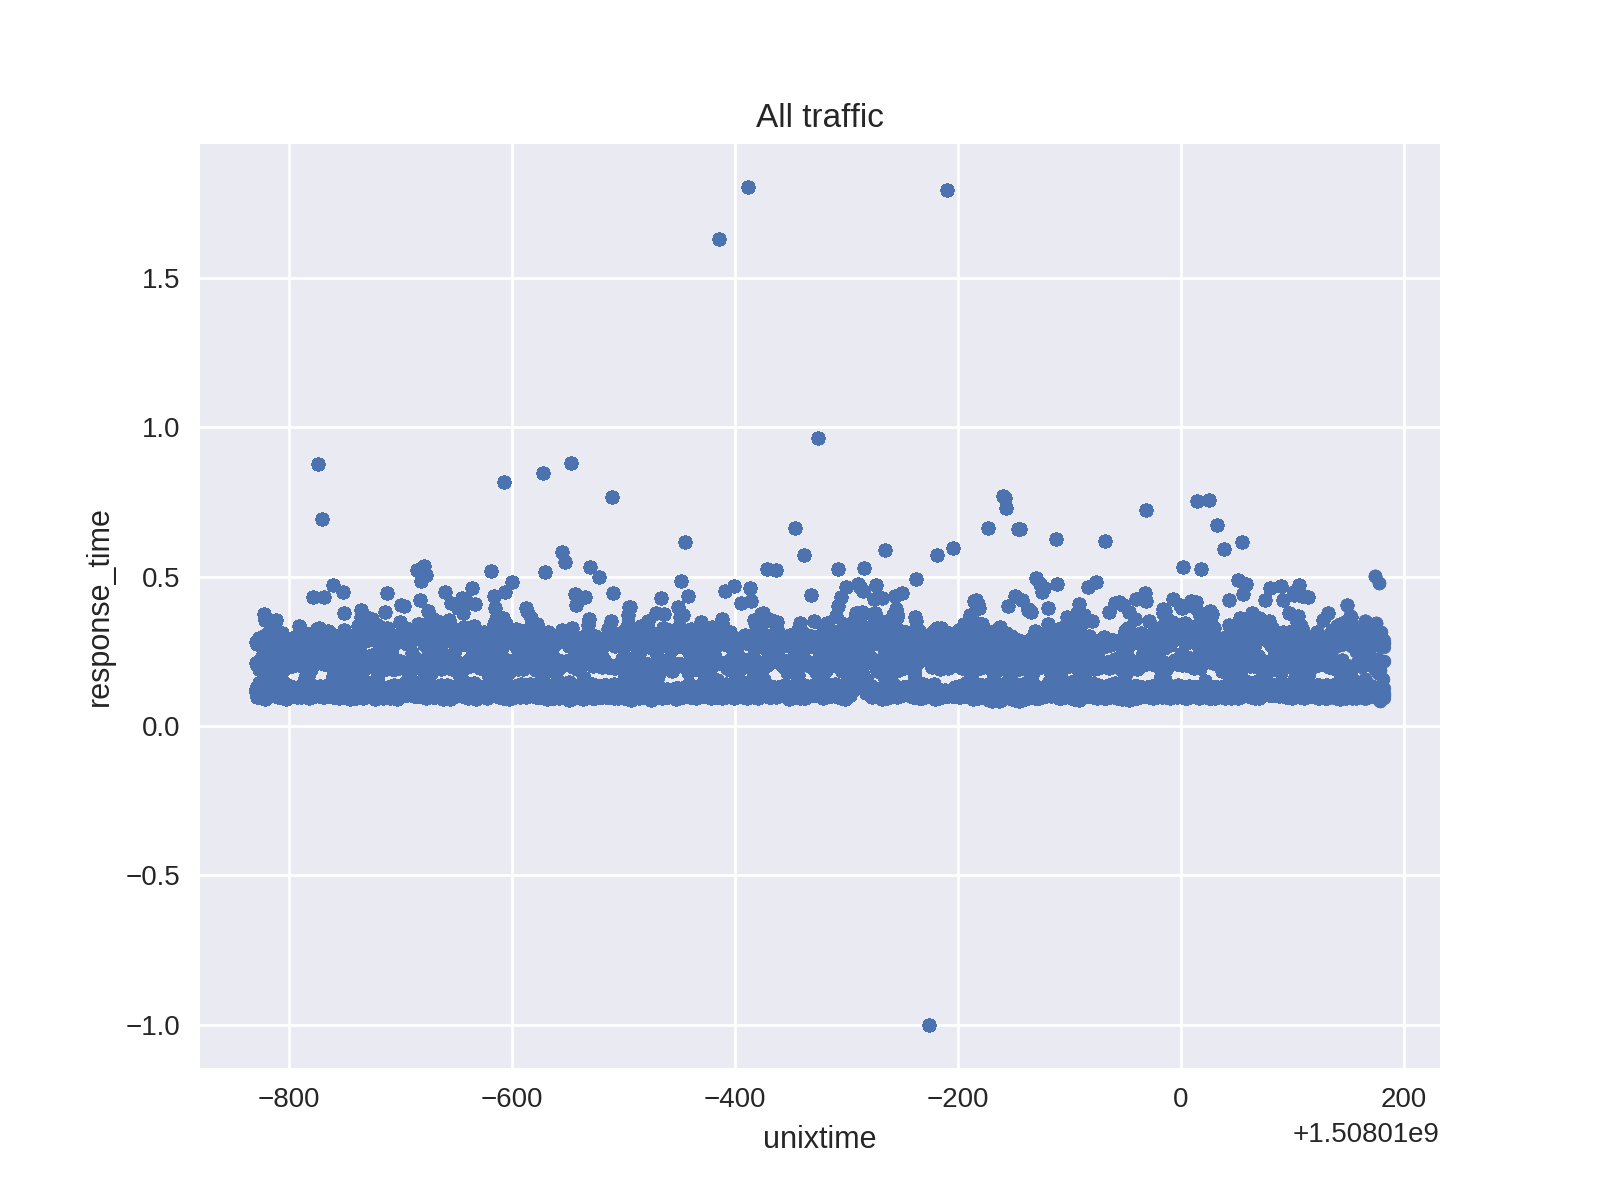

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
index = -1
if index < 0:
    plt.title('All traffic')
    traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
else:
    plt.title(traffic[traffic['url_index'] == index]['url'].unique()[0])
    traffic[traffic['url_index']==index].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
# traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')

<IPython.core.display.Javascript object>


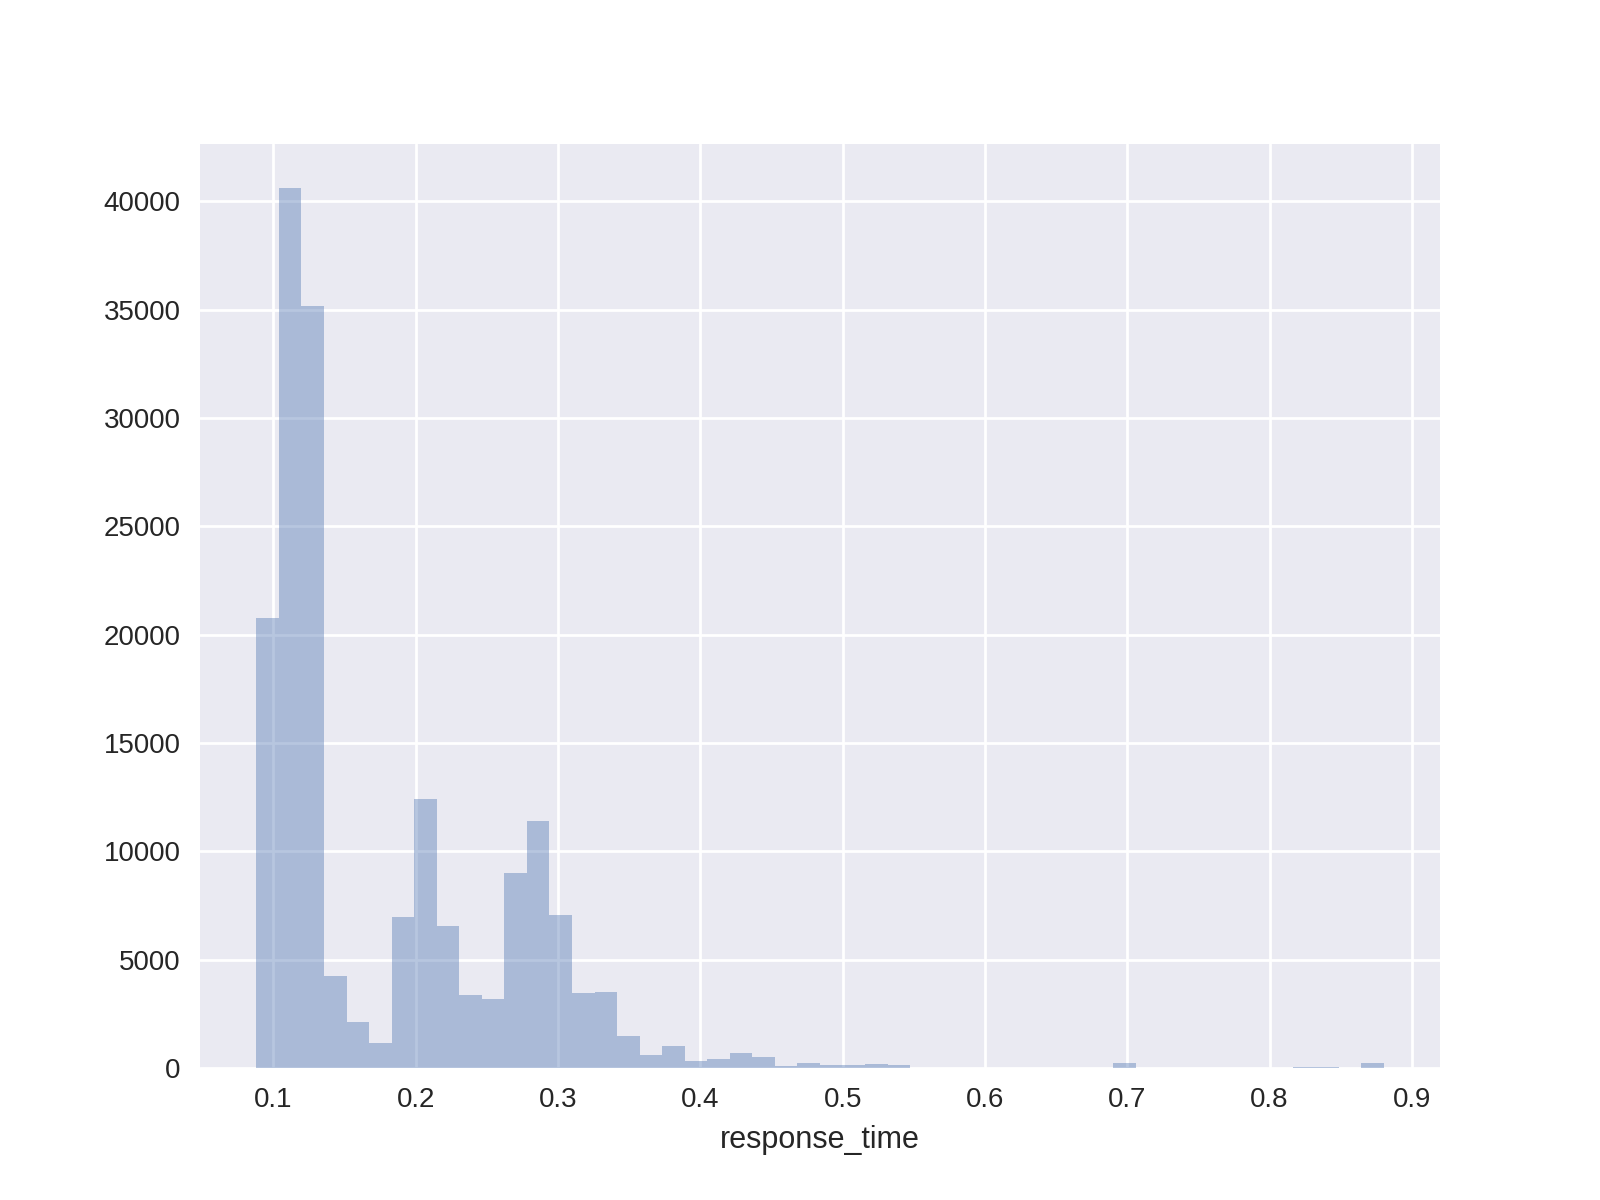

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(traffic.response_time, ax=ax, kde=False)

In [8]:
traffic['response_code'].unique()

array([200])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
traffic.groupby(['error']).count()['url_index'].plot(kind='bar', ax=ax)
plt.tight_layout()